In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline
sns.set_style('whitegrid')

In [51]:
df_train = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\music\train.csv/train.csv')
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [52]:
df_song = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\music\songs.csv/songs.csv')
df_song.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [53]:
df_mems = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\music\members.csv/members.csv')
df_mems.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [54]:
df_test = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\music\members.csv/test.csv')
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [55]:
df_mems['registration_year'] = df_mems['registration_init_time'].apply(lambda x: int(str(x)[0:4])).astype('object')
df_mems['registration_month'] = df_mems['registration_init_time'].apply(lambda x: int(str(x)[4:6])).astype('object')
df_mems['registration_date'] = df_mems['registration_init_time'].apply(lambda x: int(str(x)[6:8])).astype('object')

df_mems['expiration_year'] = df_mems['expiration_date'].apply(lambda x: int(str(x)[0:4])).astype('object')
df_mems['expiration_month'] = df_mems['expiration_date'].apply(lambda x: int(str(x)[4:6])).astype('object')
df_mems['expiration_date'] = df_mems['expiration_date'].apply(lambda x: int(str(x)[6:8])).astype('object')

In [56]:
df_mems = df_mems.drop(['registration_init_time'], axis=1)

Age Outlier removal

In [57]:
a = np.array(df_mems['bd'].values.tolist())
df_mems['bd'] = np.where(a > 100, np.nan, a).tolist()

In [58]:
a = np.array(df_mems['bd'].values.tolist())
df_mems['bd'] = np.where(a < 1, np.nan, a).tolist()

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [59]:
pal = 'husl'

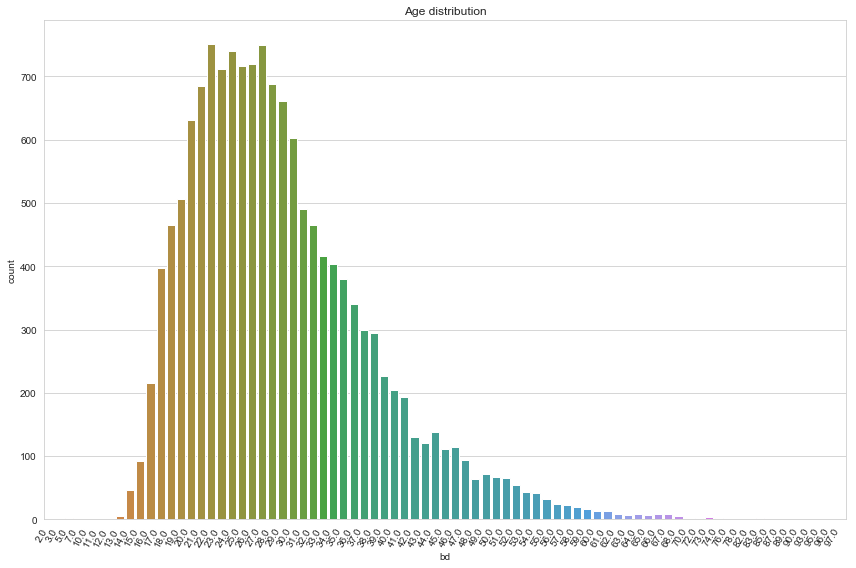

In [60]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(x="bd", data=df_mems,  palette=pal)
axarr.set_xticklabels(axarr.get_xticklabels(), rotation=60, ha="right")
plt.title('Age distribution')
plt.tight_layout()
plt.close(2)

In [61]:
df_mems['bd'] = df_mems['bd'].fillna(-2)

In [62]:
# Check number of nulls in each feature column
nulls_per_column = df_train.isnull().sum()
print(nulls_per_column)

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64


Where possible fill source screen names with source system tab

In [63]:
df_train['source_screen_name'] = df_train['source_screen_name'].fillna(df_train['source_system_tab'])
df_test['source_screen_name'] = df_test['source_screen_name'].fillna(df_test['source_system_tab'])

In [64]:
# Check number of nulls in each feature column
nulls_per_column = df_train.isnull().sum()
print(nulls_per_column)

msno                      0
song_id                   0
source_system_tab     24849
source_screen_name    22327
source_type           21539
target                    0
dtype: int64


Lower-case data so there aren't multiple categories meaning same thing

In [65]:
df_train['source_screen_name'] = df_train['source_screen_name'].astype('object').str.lower()
df_test['source_screen_name'] = df_test['source_screen_name'].astype('object').str.lower()
df_train['source_screen_name'].head(10)

0                explore
1    local playlist more
2    local playlist more
3    local playlist more
4                explore
5                explore
6    local playlist more
7                explore
8    local playlist more
9    local playlist more
Name: source_screen_name, dtype: object

###### Gender Null Removal

In [66]:
replace = ['male','female']

Replace gender nulls with a random choice between male or female. There seems to be slightly more male users in general but not a large difference. 

In [67]:
df_mems['gender'] = df_mems['gender'].fillna(pd.Series(np.random.choice(replace, size=len(df_mems.index))))
#df_test['gender'] = df_test['gender'].fillna(pd.Series(np.random.choice(replace, size=len(df_test.index))))

Combine datasets 

In [68]:
df_train = pd.merge(left = df_train,right = df_mems,how='left',on='msno')
df_train = pd.merge(left = df_train,right = df_song,how = 'left',on='song_id')
#df_train.fillna(-1,inplace=True)

In [69]:
df_test = pd.merge(left = df_test,right = df_mems,how='left',on='msno')
df_test = pd.merge(left = df_test,right = df_song,how = 'left',on='song_id')
#df_test.fillna(-1,inplace=True)

In [70]:
# Check number of nulls in each feature column
nulls_per_column = df_train.isnull().sum()
print(nulls_per_column)

msno                        0
song_id                     0
source_system_tab       24849
source_screen_name      22327
source_type             21539
target                      0
city                        0
bd                          0
gender                      0
registered_via              0
expiration_date             0
registration_year           0
registration_month          0
registration_date           0
expiration_year             0
expiration_month            0
song_length               114
genre_ids              118455
artist_name               114
composer              1675706
lyricist              3178798
language                  150
dtype: int64


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 22 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
city                  int64
bd                    float64
gender                object
registered_via        int64
expiration_date       object
registration_year     object
registration_month    object
registration_date     object
expiration_year       object
expiration_month      object
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
dtypes: float64(3), int64(3), object(16)
memory usage: 1.3+ GB


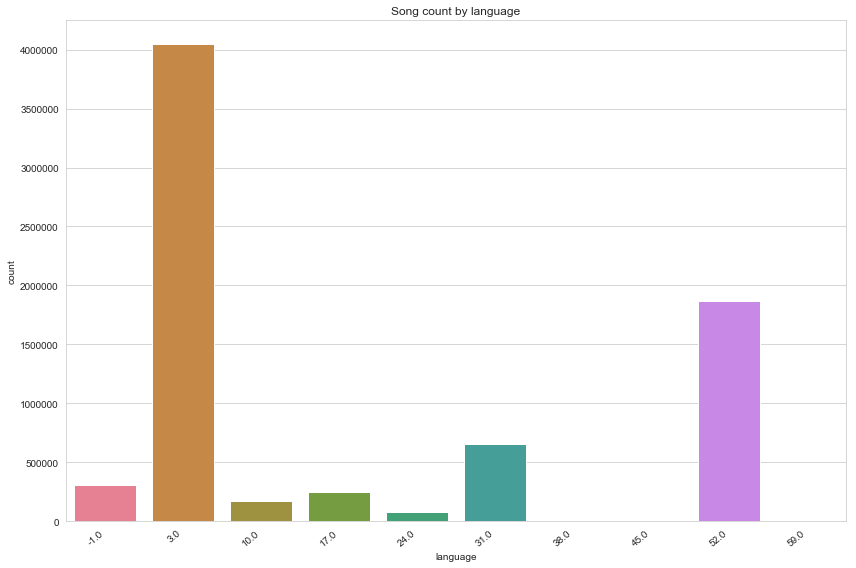

In [72]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(x="language", data=df_train,  palette=pal)
axarr.set_xticklabels(axarr.get_xticklabels(), rotation=40, ha="right")
plt.title('Song count by language')
plt.tight_layout()
plt.close(2)

In [73]:
df_train['language'] = df_train['language'].fillna(3)
df_test['language'] = df_test['language'].fillna(3)

The following chart was used as the basis for gender null imputation

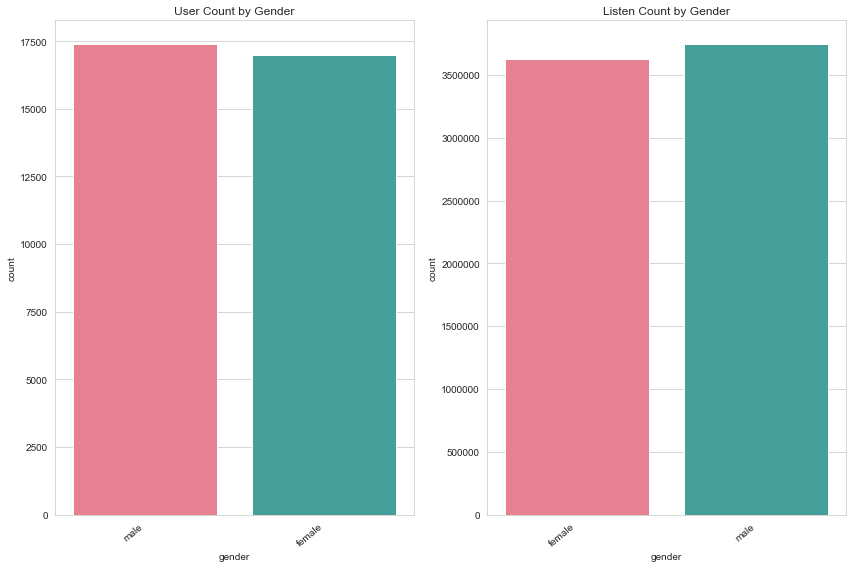

In [74]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
sns.countplot(x="gender", data=df_mems, palette=pal,ax=axarr[0],)
axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=40, ha="right")
axarr[0].set_title('User Count by Gender')

sns.countplot(x="gender", data=df_train, palette=pal,ax=axarr[1],)
axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=40, ha="right")
axarr[1].set_title('Listen Count by Gender')
plt.tight_layout()
plt.show()

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


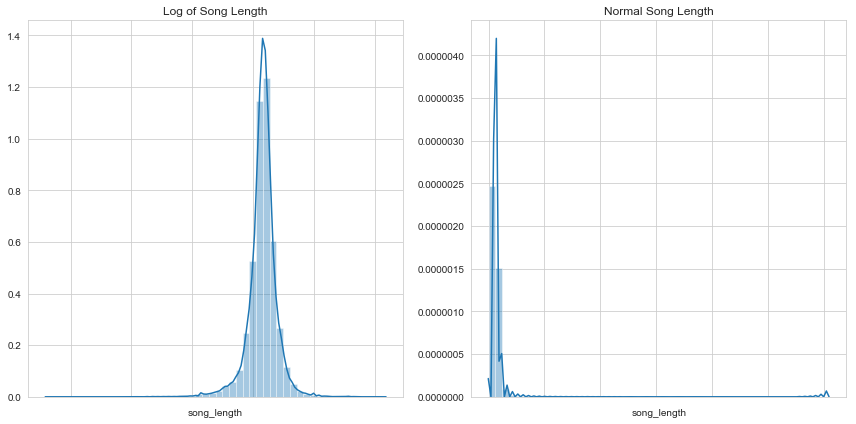

In [75]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df_song['song_length'].dropna().apply(np.log), label="Song Length",ax=axarr[0])
axarr[0].set_xticklabels(axarr[0].get_xticklabels(), rotation=40, ha="right")
axarr[0].set_title('Log of Song Length')

sns.distplot(df_song['song_length'].dropna(), label="Song Length",ax=axarr[1])
axarr[1].set_xticklabels(axarr[1].get_xticklabels(), rotation=40, ha="right")
axarr[1].set_title('Normal Song Length')
plt.tight_layout()
plt.show()

###### Song Length Null Removal

In [76]:
median_song = df_song['song_length'].median()
print('median: ', df_song['song_length'].median(), 'mean: ' ,df_song['song_length'].mean())

median:  226627.0 mean:  246993.49499677744


Data is skewed heavily towards shorter songs so nulls will be filled using the median 

In [77]:
df_train['song_length'] = df_train['song_length'].fillna(median_song)
df_test['song_length'] = df_test['song_length'].fillna(median_song)

In [78]:
# Check number of nulls in each feature column
nulls_per_column = df_train.isnull().sum()
print(nulls_per_column)

msno                        0
song_id                     0
source_system_tab       24849
source_screen_name      22327
source_type             21539
target                      0
city                        0
bd                          0
gender                      0
registered_via              0
expiration_date             0
registration_year           0
registration_month          0
registration_date           0
expiration_year             0
expiration_month            0
song_length                 0
genre_ids              118455
artist_name               114
composer              1675706
lyricist              3178798
language                    0
dtype: int64


#### Null Removal is Finished

In [79]:
df_train = df_train.fillna(-1)
df_test = df_test.fillna(-1)

In [80]:
# Check number of nulls in each feature column
nulls_per_column = df_test.isnull().sum()
print(nulls_per_column)

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
city                  0
bd                    0
gender                0
registered_via        0
expiration_date       0
registration_year     0
registration_month    0
registration_date     0
expiration_year       0
expiration_month      0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
dtype: int64


In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 22 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
city                  int64
bd                    float64
gender                object
registered_via        int64
expiration_date       int64
registration_year     int64
registration_month    int64
registration_date     int64
expiration_year       int64
expiration_month      int64
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
dtypes: float64(3), int64(9), object(10)
memory usage: 1.3+ GB


In [82]:
from tqdm import tqdm

In [83]:
cat_list = df_train.drop(['song_length','target','registration_year','registration_month'
                         ,'expiration_month','expiration_year','bd'],axis=1).columns.values
print(cat_list)

['msno' 'song_id' 'source_system_tab' 'source_screen_name' 'source_type'
 'city' 'gender' 'registered_via' 'expiration_date' 'registration_date'
 'genre_ids' 'artist_name' 'composer' 'lyricist' 'language']


In [84]:
num_vals = ['song_length','registration_year','registration_month'
                         ,'expiration_month','expiration_year','bd']

for col in tqdm(cat_list):
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:31<00:00,  1.56s/it]


In [85]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,registration_month,registration_date,expiration_year,expiration_month,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,explore,online-playlist,1,1,-2.0,female,7,...,1,2,2017,10,206471.0,359,Bastille,Dan Smith| Mark Crew,-1,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,local playlist more,local-playlist,1,13,24.0,female,9,...,5,25,2017,9,284584.0,1259,Various Artists,-1,-1,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,local playlist more,local-playlist,1,13,24.0,female,9,...,5,25,2017,9,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,-1,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,local playlist more,local-playlist,1,13,24.0,female,9,...,5,25,2017,9,255512.0,1019,Soundway,Kwadwo Donkoh,-1,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,explore,online-playlist,1,1,-2.0,female,7,...,1,2,2017,10,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,-1,52.0


In [86]:
for col in tqdm(cat_list):
    if df_train[col].dtype == 'category':
        df_train[col] = df_train[col].apply(str)
        df_test[col] = df_test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(df_train[col].unique())
        test_vals = list(df_test[col].unique())
        le.fit(train_vals + test_vals)
        df_train[col] = le.transform(df_train[col])
        df_test[col] = le.transform(df_test[col])

        print(col + ': ' + str(len(train_vals)) + ', ' + str(len(test_vals)))

print(df_train.head())
print(df_test.head())

  0%|                                                                                                                                                               | 0/15 [00:00<?, ?it/s]

msno: 30755, 25131


  7%|██████████                                                                                                                                             | 1/15 [00:03<00:54,  3.91s/it]

song_id: 359966, 224753


 13%|████████████████████▏                                                                                                                                  | 2/15 [00:20<01:39,  7.68s/it]

source_system_tab: 9, 9


 20%|██████████████████████████████▏                                                                                                                        | 3/15 [00:22<01:12,  6.08s/it]

source_screen_name: 25, 27


 27%|████████████████████████████████████████▎                                                                                                              | 4/15 [00:24<00:53,  4.89s/it]

source_type: 13, 13


 33%|██████████████████████████████████████████████████▎                                                                                                    | 5/15 [00:27<00:41,  4.11s/it]

city: 21, 21


 40%|████████████████████████████████████████████████████████████▍                                                                                          | 6/15 [00:29<00:31,  3.53s/it]

gender: 2, 2


 47%|██████████████████████████████████████████████████████████████████████▍                                                                                | 7/15 [00:31<00:24,  3.12s/it]

registered_via: 5, 6


 53%|████████████████████████████████████████████████████████████████████████████████▌                                                                      | 8/15 [00:33<00:20,  2.86s/it]

expiration_date: 31, 31


 60%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 9/15 [00:35<00:15,  2.64s/it]

registration_date: 31, 31


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 10/15 [00:38<00:13,  2.77s/it]

genre_ids: 573, 502


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 11/15 [00:42<00:11,  2.90s/it]

artist_name: 40583, 27564


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 12/15 [00:47<00:10,  3.64s/it]

composer: 76065, 52307


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 13/15 [01:16<00:22, 11.25s/it]

lyricist: 33889, 24911


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 14/15 [01:21<00:09,  9.27s/it]

language: 10, 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:24<00:00,  7.35s/it]


    msno  song_id  source_system_tab  source_screen_name  source_type  target  \
0   9176    86884                  2                   9            7       1   
1  19273   260594                  4                  11            5       1   
2  19273   140755                  4                  11            5       1   
3  19273    27577                  4                  11            5       1   
4   9176    38706                  2                   9            7       1   

   city    bd  gender  registered_via    ...     registration_month  \
0     0  -2.0       0               4    ...                      1   
1     4  24.0       0               5    ...                      5   
2     4  24.0       0               5    ...                      5   
3     4  24.0       0               5    ...                      5   
4     0  -2.0       0               4    ...                      1   

   registration_date  expiration_year  expiration_month  song_length  \
0             

In [87]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#df_train[['song_length','registration_year','registration_month','expiration_month','registration_date',
#'expiration_date','expiration_year','bd']] = scaler.fit_transform(df_train[['song_length','registration_year','registration_month',
#                                'expiration_month','registration_date','expiration_date','expiration_year','bd']])

#df_test[['song_length','registration_year','registration_month','expiration_month','registration_date',
#'expiration_date','expiration_year','bd']] = scaler.transform(df_test[['song_length','registration_year','registration_month',
#                                'expiration_month','registration_date','expiration_date','expiration_year','bd']])

In [88]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,registration_month,registration_date,expiration_year,expiration_month,song_length,genre_ids,artist_name,composer,lyricist,language
0,9176,86884,2,9,7,1,0,-2.0,0,4,...,1,11,2017,10,206471.0,308,3785,16654,48,8
1,19273,260594,4,11,5,1,4,24.0,0,5,...,5,17,2017,9,284584.0,98,36868,71,48,8
2,19273,140755,4,11,5,1,4,24.0,0,5,...,5,17,2017,9,225396.0,98,24602,51541,48,8
3,19273,27577,4,11,5,1,4,24.0,0,5,...,5,17,2017,9,255512.0,7,31652,41992,48,0
4,9176,38706,2,9,7,1,0,-2.0,0,4,...,1,11,2017,10,187802.0,3,5191,9702,48,8


In [89]:
X_train = np.array(df_train.drop(['target'], axis=1))
y_train = df_train['target'].values

X_test = np.array(df_test.drop(['id'], axis=1))
ids = df_test['id'].values

#X_train = np.log(X_train)
#out_test = np.log(out_test)
#X_test = np.log(X_test)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [90]:
import xgboost as xgb

In [91]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid) 
d_test = xgb.DMatrix(X_test)

In [92]:
# Create the parameter dictionary: params
params = {"objective":"binary:logistic", "max_depth":10, 'n_estimators':20,'colsample_bytree':0.3}

# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=d_train, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

[19:59:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1788 extra nodes, 0 pruned nodes, max_depth=10
[19:59:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1718 extra nodes, 0 pruned nodes, max_depth=10
[20:00:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1714 extra nodes, 0 pruned nodes, max_depth=10
[20:00:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1762 extra nodes, 0 pruned nodes, max_depth=10
[20:00:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1682 extra nodes, 0 pruned nodes, max_depth=10
[20:00:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1766 extra nodes, 0 pruned nodes, max_depth=10
[20:01:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:

In [93]:
from xgboost import XGBClassifier
#params = {"booster":"gbtree",
#          "objective":"binary:logistic", 
#         "max_depth":4,
#         'eval_metric': 'auc'}
params['eval_metric'] = 'auc'
params['booster'] = 'gbtree'
params['max_depth'] = '10'
params['n_estimators'] = '20'
params['colsample_bytree'] = '0.3'

#model = xgb.train(params, train_dmat, maximize=True, verbose_eval=5)

model = XGBClassifier(params=params)
model.fit(X_train, y_train)

[20:02:58] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       params={'objective': 'binary:logistic', 'max_depth': '10', 'n_estimators': '20', 'colsample_bytree': '0.3', 'eval_metric': 'auc', 'booster': 'gbtree'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [94]:
p_test = model.predict(X_test)

# Prepare submission
print(len(ids), len(p_test))
subm = pd.DataFrame()
subm['id'] = ids
subm['target'] = p_test
subm.to_csv(r'C:\Users\casocha\Desktop\Kaggle\music\submission.csv', index=False)

2556790 2556790


In [95]:
# make predictions for test data and evaluate
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_valid)

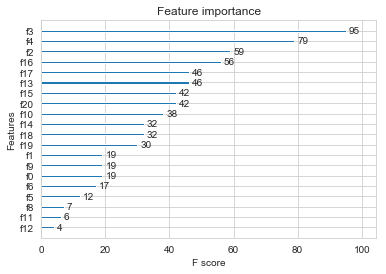

In [96]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(model)
pyplot.show()

In [97]:
predictions = [round(value) for value in y_pred]
accuracy = roc_auc_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 63.25%
